In [6]:
import numpy as np
import math
import pandas as pd

from geneticalgorithm2 import geneticalgorithm2 as ga # for creating and running optimization mode
from geneticalgorithm2 import Generation, AlgorithmParams # classes for comfortable parameters setting and getting
from geneticalgorithm2 import Crossover, Mutations, Selection # classes for specific mutation and crossover behavior
from geneticalgorithm2 import Population_initializer # for creating better start population
from geneticalgorithm2 import np_lru_cache # for cache function (if u want)
from geneticalgorithm2 import plot_pop_scores # for plotting population scores, if u want
from geneticalgorithm2 import Actions, ActionConditions, MiddleCallbacks # middle callbacks

In [7]:
 #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
data = pd.read_csv ('data_6_3_LINGO.csv')
df = pd.DataFrame(data)

b3 = df[["B3"]].to_numpy()
b4 = df[["B4"]].to_numpy()
b5 = df[["B5"]].to_numpy()

# profit contribution per 1000 feet
profits = [15.89, 17.89, 16.5, 15.22, 17.5, 16.22]

cota_maxima_benef = profits[0]*315 + profits[1]*315 + profits[2]*210 + profits[3]*157.5 + profits[4]*210 + profits[5]*157.5
cota_maxima_1000s = 315+315+210+157.5+210+157.5

In [27]:
def f(X):
    pen = 0
    if 1000/(b3[0]*60)*X[0] + 1000/(b3[0]*60)*X[1] > b3[1]:
        pen += cota_maxima_benef + 10000*(1000/(b3[0]*60)*X[0] + 1000/(b3[0]*60)*X[1] - b3[1])
    if 1000/(b4[0]*60)*X[2] + 1000/(b4[0]*60)*X[4] > b4[1]:
        pen += cota_maxima_benef + 10000*(1000/(b4[0]*60)*X[2] + 1000/(b4[0]*60)*X[4] - b4[1])
    if 1000/(b5[0]*60)*X[3] + 1000/(b5[0]*60)*X[5] > b5[1]:
        pen += cota_maxima_benef + 10000*(1000/(b5[0]*60)*X[3] + 1000/(b5[0]*60)*X[5] - b5[1])
    if X[0]+X[1]+X[2]+X[3]+X[4]+X[5] > 600:
        pen += cota_maxima_benef + 10000*(X[0]+X[1]+X[2]+X[3]+X[4]+X[5] - 600)
    if X[1] + X[2] + X[3] < 114:
        pen += (315+210+157.5) + 10000*abs(X[1] + X[2] + X[3] - 114)
    if X[4] + X[5] < 111:
        pen += (210+157.5) + 10000*abs(X[4] + X[5] - 111)
        
    res = float(profits[0]*X[0]) + float(profits[1]*X[1]) + float(profits[2]*X[2]) + float(profits[3]*X[3]) + float(profits[4]*X[4]) + float(profits[5]*X[5]) - float(pen)
    return -res
    

In [28]:
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size': 1000,\
                   'mutation_probability':0.5,\
                   'elit_ratio': 0.0,\
                   'parents_portion': 0.3,\
                   'crossover_type':'one_point',\
                   'mutation_type':'gauss_by_center',\
                   'selection_type':'tournament',\
                   'max_iteration_without_improv':None}


Average time of function evaluating (secs): 0.0006999351978302002 (total = 0.6999351978302002)

Best score before optimization: -9496.43719496096
                                                                                                                                                                                                        
 The best found solution:
 [219.2279451   90.3445408   23.19531711   1.34354693 186.68153995
  79.20042438]

 Objective function:
 -10054.52523159768

 Used generations: 1000
 Used time: 171 seconds


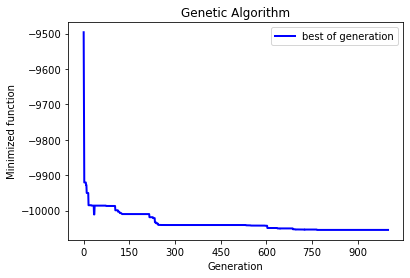

In [29]:
import time

#              B34      B38     B48      B58      B42      B52
varbound = [[218,315],[0,315],[0,210],[0,157.5],[0,210],[0,157.5]]

model=ga(function=f,dimension=6,variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)

result = model.run()

In [43]:
print(result.variable)
print(result.score)

[inf inf inf inf inf inf]
-10054.52523159768


## Aplicar descenso de gradiente

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

X=result.variable
Y=-result.score

In [48]:
import random

def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
    b,theta=initialize(6)
    print("Bias: ",b,"Weights: ",theta)

In [42]:
initialize(6)

(0.5014111055585944,
 array([0.0121269 , 0.88229668, 0.53064011, 0.11697884, 0.02985204,
        0.63107848]))

In [50]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)

In [60]:
import math

def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/Y.size

In [61]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/y.size
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [62]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.size)
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
        result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of b and theta : ",b,theta)
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

TypeError: object of type 'numpy.float64' has no len()